In [40]:
import matplotlib.pyplot as plt
from scipy import stats, optimize
import numpy as np
import sympy as sym
import csv
import pylab as pb

import inputs
import models
import shooting

from __future__ import division

import estimation_code_norm as est

In [5]:
%matplotlib inline

In [432]:
# define some default workers skill
x, mu1, sigma1 = sym.var('x, mu1, sigma1')
skill_cdf = 0.5 + 0.5 * sym.erf((x - mu1) / sym.sqrt(2 * sigma1**2))
skill_params = {'mu1': 0, 'sigma1': 1.0}
skill_bounds = [1e-2, 5.0]

workers = inputs.Input(var=x,
                       cdf=skill_cdf,
                       params=skill_params,
                       bounds=skill_bounds,
                       )

# define some default firms
y, mu2, sigma2 = sym.var('y, mu2, sigma2')
productivity_cdf = (0.5 + 0.5 * sym.erf((y - mu2) / sym.sqrt(2 * sigma2**2)))
productivity_params = {'mu2': 0.0, 'sigma2': 1.0}
productivity_bounds = [1e-2, 5.0]

firms = inputs.Input(var=y,
                     cdf=productivity_cdf,
                     params=productivity_params,
                     bounds=productivity_bounds,
                     )

# define symbolic expression for CES between x and y
omega_A, sigma_A, Big_A = sym.var('omega_A, sigma_A, Big_A')
A = ((omega_A * x**((sigma_A - 1) / sigma_A) + 
     (1 - omega_A) * y**((sigma_A - 1) / sigma_A))**(sigma_A / (sigma_A - 1))) 

# define symbolic expression for Cobb-Douglas between l and r
l, r, omega_B, sigma_B = sym.var('l, r, omega_B, sigma_B')
B = l**omega_B * r**(1 - omega_B)

F = Big_A * (A * B)

F_params = {'omega_A':0.6, 'omega_B':0.9, 'sigma_A':0.27660712, 'Big_A':90.53818478}
        
model = models.Model('positive',
                     workers=workers,
                     firms=firms,
                     production=F,
                     params=F_params)



In [439]:
functions, new_guess = est.Solve_Model2(F, F_params, workers, firms, 'positive', 100, 'vode', 500.0)
theta_pi, w_pi, pis_fm = functions

AssertionError: Fail to solve!

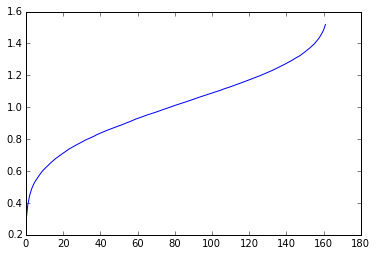

In [79]:
plt.plot(pis)
#plt.plot(pis_fm, c='r')
plt.show()

In [19]:
# Opening data
with open('PD05_wage.csv', 'rb') as f:
    reader = csv.reader(f)
    data05 = list(reader)

In [283]:
# Passing data to lists, then to arrays (should change this to make it all in one) 
size05 = []
wage05 = []
profit05 = []
skill_w05 = []

for row in data05[1:]:
    size05.append(int(row[1]))
    wage05.append(float(row[2]))
    profit05.append(float(row[3]))
    skill_w05.append(float(row[4]))
# Firm size in workers (int)
size05 = np.asarray(size05)
# Daily average wage for each firm, in euros (float)
wage05 = np.asarray(wage05)
# Declared average profits for each firm per year, in euros (float)
profit05 = np.asarray(profit05)
# Average education level of workers per firm, from 0 to 6 (float)
skill_w05 = np.asarray(skill_w05)

print "Sample size: "+str(len(size05))


Sample size: 73544


In [306]:
n_size = dict(enumerate(size05))
n_wage= dict(enumerate(wage05))
n_profit = dict(enumerate(profit05))
all_people = sum(size05)

In [321]:
import operator
n_size2 = sorted(n_size.items(), key=operator.itemgetter(1))
n_size3 = []
n_wage3 = []
n_profit3 = []
for i in n_size2:
    if i[1]>0:
        n_size3.append(i[1])
        n_wage3.append(n_wage[i[0]])
        n_profit3.append(n_profit[i[0]])

In [376]:
size_data = []
w_data = []
pi_data = []
nobs_data = []

bs = []
bw = []
bp = []

people = 0
people_bin = np.linspace(1,len(n_size3),100)
j=0

for i in range(len(n_size3)):
    people += 1
    if people<=people_bin[j]:
        bs.append(n_size3[i])
        bw.append(n_wage3[i])
        bp.append(n_profit3[i])
        bm += 1
    else:
        j +=1
        size_data.append(np.mean(bs))
        w_data.append(np.mean(bw))
        pi_data.append(np.mean(bp))
        nobs_data.append(bm)
        # Clear cache
        bs = [n_size3[i]]
        bw = [n_wage3[i]]
        bp = [n_profit3[i]]
        bm = 1


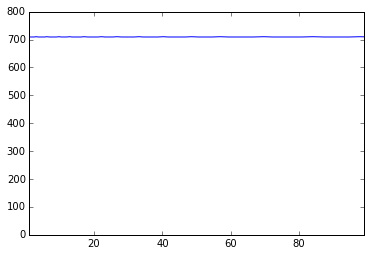

In [397]:
plt.plot(size_data,nobs_data)
plt.xlim(1,len(size_data))
plt.show()

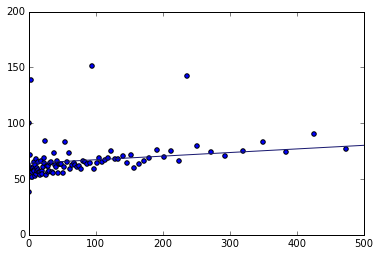

0.0322694663743 64.0339081694


In [395]:
plt.scatter(size_data, w_data)
m, b = np.polyfit(size_data, w_data, 1)
line_s = []
for i in size_data:
    line_s.append(m*i + b )
plt.plot(size_data, line_s, '-', c='midnightblue')

plt.xlim(0,500)
plt.ylim(0,200)
plt.show()
print m,b

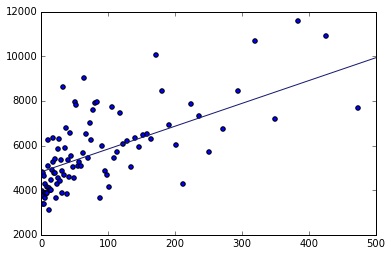

10.2284499185 4821.27464351


In [417]:
plt.scatter(size_data[:-3], pi_data[:-3])
m, b = np.polyfit(size_data[:-3], pi_data[:-3], 1)
line_s = []
for i in size_data[:-3]:
    line_s.append(m*i + b)
plt.plot(size_data[:-3], line_s, '-', c='midnightblue')

plt.xlim(0,500)
#plt.ylim(0,20)
plt.show()
print m,b

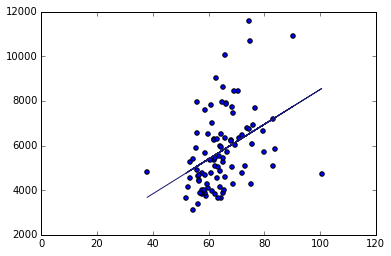

77.926064968


In [411]:
cut_w = []
cut_pi = []
for i in range(len(w_data)):
    if w_data[i]<120:
        cut_w.append(w_data[i])
        cut_pi.append(pi_data[i])

plt.scatter(cut_w[:-3], cut_pi[:-3])
line_s = []
m, b = np.polyfit(cut_w[:-3], cut_pi[:-3], 1)
for i in cut_w[:-3]:
    line_s.append(m*i + b)
plt.plot(cut_w[:-3], line_s, '-', c='midnightblue')
plt.xlim(0,120)
plt.show()
print m

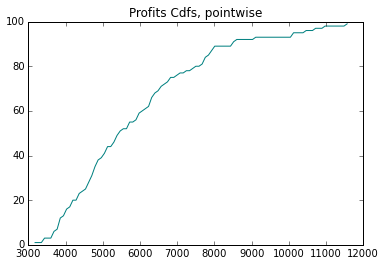

In [421]:
# your array of numbers
num_bins = 100
counts05, bin_edges05 = np.histogram(pi_data, bins=num_bins, normed=False)
cdf = np.cumsum(counts05)
pb.plot(bin_edges05[1:], cdf, color='teal', label="data")

#countsfm, bin_edgesfm = np.histogram(pis_fm, bins=num_bins, normed=False)
#cdfm = np.cumsum(countsfm)
#pb.plot(bin_edgesfm[1:], cdfm, color='indigo', label="model")


plt.title('Profits Cdfs, pointwise')
#plt.ylim(0,400)
#plt.xlim(0,max(log_pi))
plt.show()

In [440]:
max(size_data)

1155.7574047954865

In [423]:
with open('SPA05.csv', 'wb') as fp:
    writer = csv.writer(fp, delimiter=',')
    data = [['size','wage','profit']]
    for i in range(len(size_data)):
        row = [str(size_data[i]),str(w_data[i]),str(pi_data[i])]
        data.append(row)
    writer.writerows(data)